# Hierarchical cell type annotation

Cytopus now includes a framework for hierarchically annotating single cell data. Thereby single cell annotations data can be fitted into a hierarchical taxonomy. Cytopus finds the most granular cell type labels and fits it into a predefined taxonomy. This facilitates consistent hierarhical annotations by avoiding assigning multiple labels of different branches in a hierarchical cell type taxonomy. It also enables hierarchical queries to subset cell types of interest or assess their marker gene expression. Finally, cells labeled according to a hierarchical taxonomy can be easily be extracted and used to train our hierarchical cell type annotation method Compocyte.

In [2]:
#pygraphviz is required for plotting
# if it fails to install try running:
'''
sudo apt-get update
sudo apt-get install graphviz libgraphviz-dev pkg-config

'''
!apt install libgraphviz-dev
!pip install pygraphviz

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
  Using cached pygraphviz-1.13.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.13-cp312-cp312-linux_x86_64.whl size=97951 sha256=c50263ccf8aa4d45e9ad69c501fb7d4a02bcfa383ac1bfb005f6c67db9dce2a6
  Stored in directory: /home/wallet/.cache/pip/wheels/a5/12/45/64c6e839281b1ed7e07a4ffb0947b3321431a5a53b1870882a
Successfully built pygraphviz


In [1]:
!pip install cytopus
!pip install scanpy

In [ ]:
#networkx required if not already installed
!pip install networkx

In [1]:
#import packages
import networkx as nx
import cytopus as cp
import scanpy as sc
from matplotlib import rcParams

In [2]:
#load cytopus knowledge base
G = cp.KnowledgeBase()

KnowledgeBase object containing 92 cell types and 201 cellular processes



We will now build the hierarchy class which requires a nested dictionary containing the cell type hierarchy of the form

{'cell_type_a_level_1':{'cell_type_b_level_2':{},
'cell_type_c_level_2':{'cell_type_d_level_3':{},'cell_type_e_level_3':{'cell_type_f_level_4':{}}},
'cell_type_g_level_2':{'cell_type_h_level_3':{}}
}}

In [3]:
#get nested dict of hierarchy in cytopus knowledge base
hierarchy_dict = cp.tl.hierarchy.get_hierarchy_dict(G)
#build hierarchy class
H = cp.tl.hierarchy.Hierarchy(hierarchy_dict)

Hierarchy class containing 92 cell types:['B', 'B-memory', 'B-memory-DN', 'B-memory-IgM-MZ', 'B-memory-non-switched', 'B-memory-switched', 'B-naive', 'B-pb-mature', 'B-pb-t1', 'B-pb-t2', 'B-pb-t3', 'CD4-T', 'CD4-TCM', 'CD4-TEM', 'CD4-TRM', 'CD4-TSCM', 'CD4-Teffector', 'CD56bright-NK', 'CD56dim-NK', 'CD8-T', 'CD8-T-progenitor-exhausted', 'CD8-TCM', 'CD8-TEM', 'CD8-TRM', 'CD8-TSCM', 'CD8-T_KLRG1neg-effector', 'CD8-T_KLRG1pos-effector', 'CD8-T_terminal-exhaustion', 'CD8-Teffector', 'DC', 'FDC', 'GC-B', 'ILC', 'ILC1', 'ILC2', 'ILC3', 'ILC3-NCRneg', 'ILC3-NCRpos', 'Langerhans', 'Lti', 'M', 'MAIT', 'MDC', 'Mac', 'NK', 'NK-adaptive', 'NSCLC-carcinoma-cell', 'T', 'T-naive', 'TCM', 'TEM', 'TFH', 'TNK', 'TRM', 'TSCM', 'Treg', 'abT', 'all-cells', 'baso', 'c-mono', 'cDC', 'cDC1', 'cDC2', 'cDC3', 'capillary', 'carcinoma-cell', 'colon-epi', 'crc-carcinoma-cell', 'endo', 'endo-aerocyte', 'endo-arterial', 'endo-lymphatic', 'endo-systemic-venous', 'eosino', 'epi', 'fibro', 'gdT', 'gran', 'iNKT', 'leuko

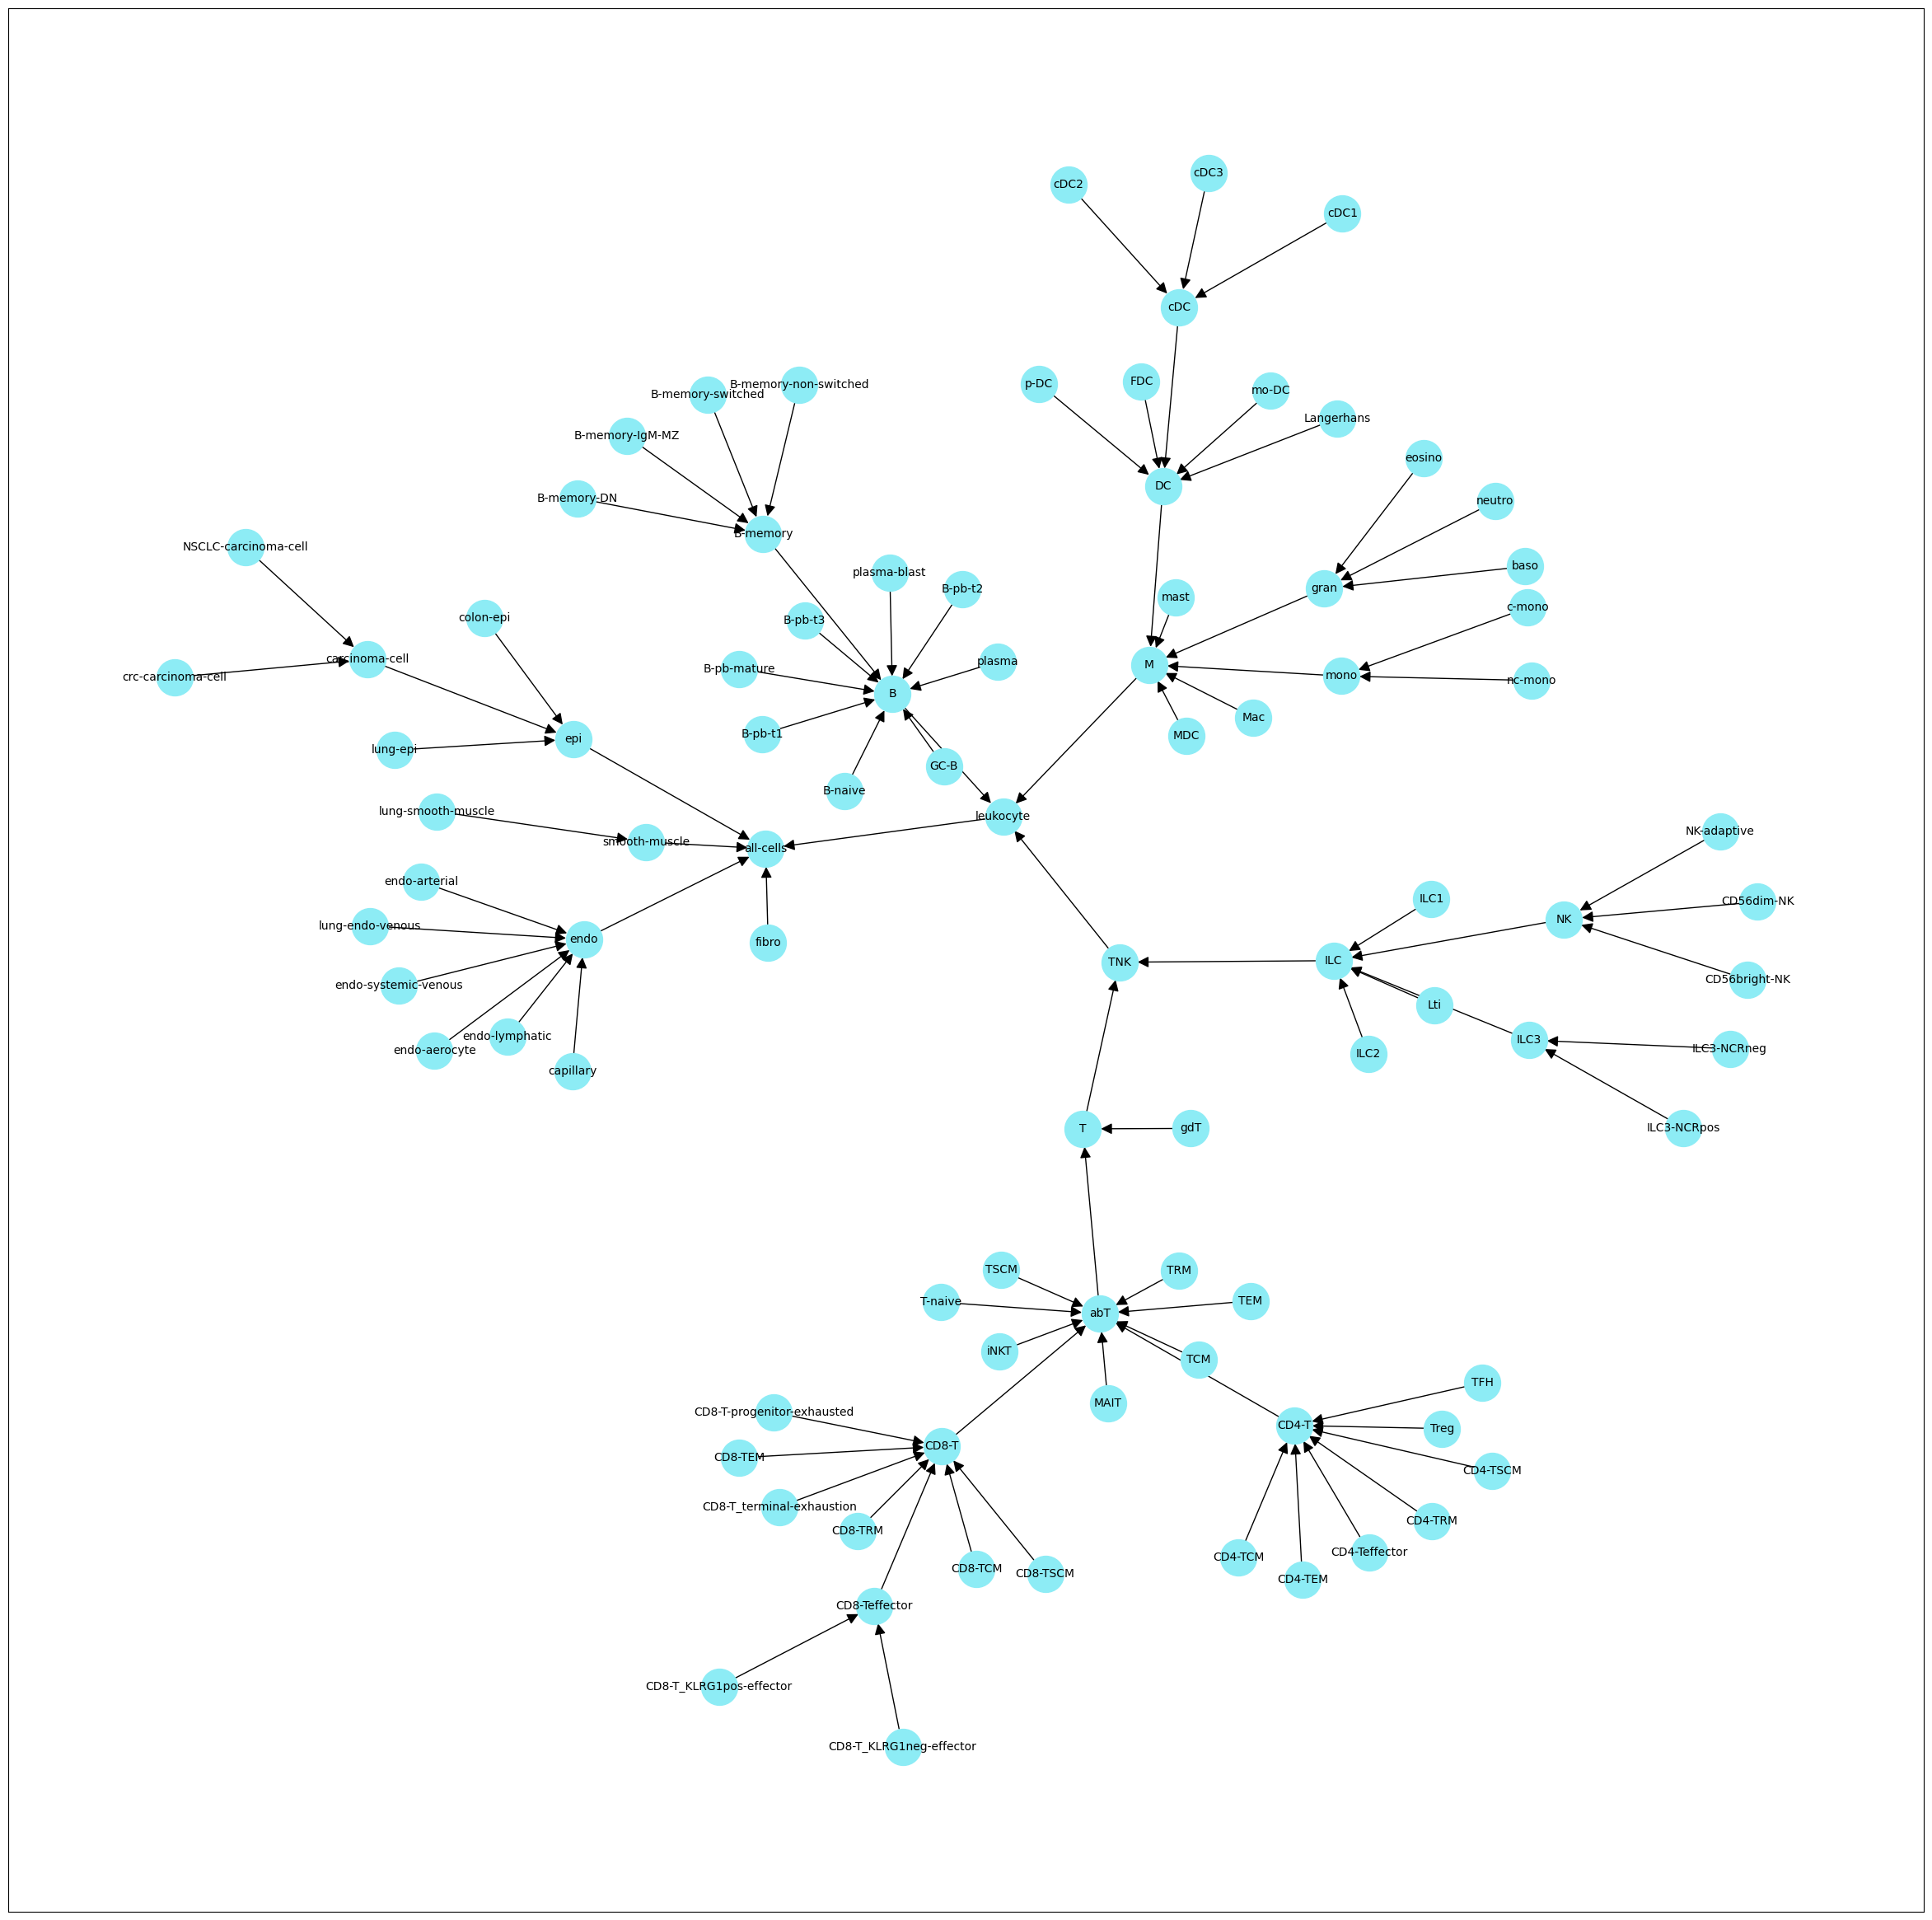

In [4]:
#inspect cell type hierarchy
H.plot_celltypes(figsize=[30,30])

# load example data

In [5]:
#paths
import importlib.resources as pkg_resources
import cytopus.data
with pkg_resources.path(cytopus.data, 'adata_spectra.h5ad') as file_path:
    adata = sc.read_h5ad(file_path)

/tmp/ipykernel_11221/3241767917.py:4: DeprecationWarning: path is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  with pkg_resources.path(cytopus.data, 'adata_spectra.h5ad') as file_path:


In [6]:
#annotations are stored here
adata.obs[['annotation_level_1', 'annotation_level_2', 'annotation_level_3']]

,annotation_level_1,annotation_level_2,annotation_level_3
0,B,B,B-naive
1,TNK,CD8-T,CD8-T
2,TNK,CD8-T,CD8-T
3,M,M,MDC
4,TNK,CD4-T,Treg
...,...,...,...
9995,B,B,B-memory
9996,TNK,CD8-T,CD8-T
9997,B,B,B-naive
9998,M,M,MDC


In [7]:
#add cells to annotation object
H.add_cells(adata, obs_columns=['annotation_level_1', 'annotation_level_2', 'annotation_level_3'])

In [8]:
#starting on top of the hierarchy we can find the most granular cell type label for each cell
H.query_ancestors(query_node='leukocyte', adata=adata, obs_key='hierarchical_query')

In [9]:
#the output will be added to a dictionary
H.annotations.keys()

dict_keys(['cDC1', 'TRM', 'nc-mono', 'CD8-T', 'Mac', 'eosino', 'cDC', 'NK', 'MAIT', 'CD4-TRM', 'DC', 'B-naive', 'ILC2', 'abT', 'neutro', 'CD8-T_KLRG1neg-effector', 'CD8-TRM', 'NK-adaptive', 'B', 'gran', 'CD8-T_KLRG1pos-effector', 'B-memory-non-switched', 'FDC', 'GC-B', 'c-mono', 'TCM', 'TFH', 'B-pb-t2', 'B-memory-IgM-MZ', 'CD4-TCM', 'CD4-TEM', 'CD4-T', 'B-memory', 'CD56bright-NK', 'ILC', 'plasma-blast', 'B-memory-switched', 'cDC3', 'iNKT', 'Treg', 'CD8-T_terminal-exhaustion', 'T-naive', 'CD8-Teffector', 'ILC1', 'TEM', 'cDC2', 'CD4-Teffector', 'TNK', 'leukocyte', 'baso', 'mo-DC', 'plasma', 'ILC3', 'mono', 'B-pb-mature', 'B-memory-DN', 'M', 'T', 'CD8-TSCM', 'p-DC', 'CD56dim-NK', 'B-pb-t3', 'CD4-TSCM', 'ILC3-NCRpos', 'CD8-T-progenitor-exhausted', 'mast', 'Langerhans', 'MDC', 'gdT', 'B-pb-t1', 'TSCM', 'CD8-TCM', 'CD8-TEM', 'Lti', 'ILC3-NCRneg'])

In [10]:
#and to the adata
adata.obs['hierarchical_query'].head()


0    B-naive
1      CD8-T
2      CD8-T
3        MDC
4       Treg
Name: hierarchical_query, dtype: object

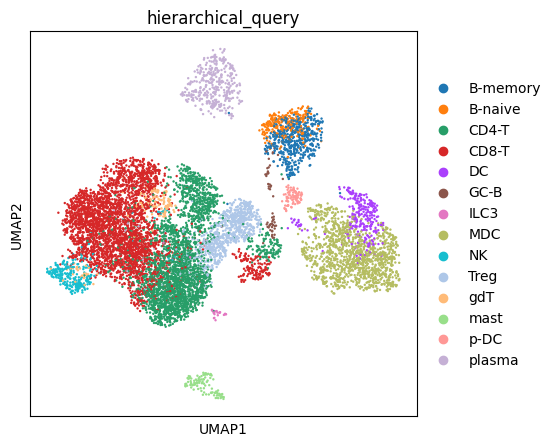

In [11]:
FIGSIZE = (5, 5)
rcParams["figure.figsize"] = FIGSIZE
sc.pl.umap(adata,color='hierarchical_query')

You can also use this information to subset your data using the hierarchy. E.g. we can retrieve all myeloid cell 'M' with all their subsets.

In [12]:
#starting on top of the hierarchy we can find the most granular cell type label for each cell
H.query_ancestors(query_node='M', adata=adata, obs_key='M')
H.query_ancestors(query_node='DC', adata=adata, obs_key='DC')

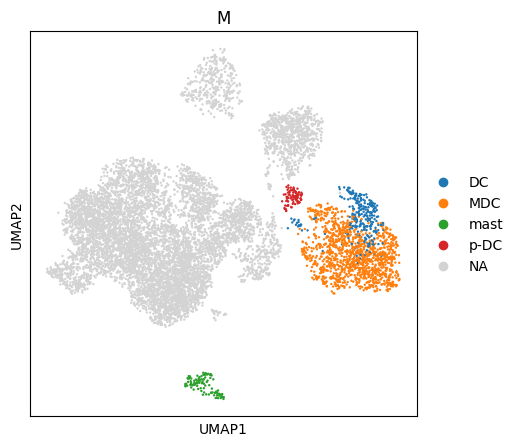

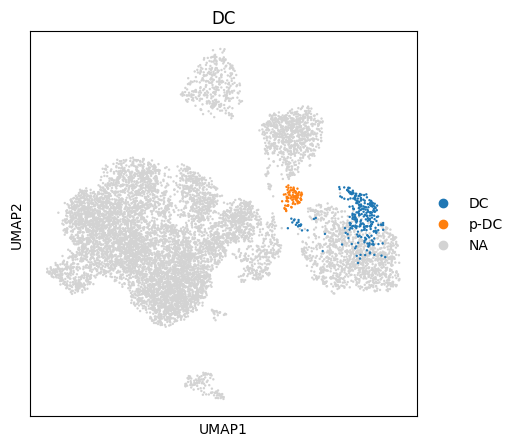

In [13]:
sc.pl.umap(adata,color='M')
sc.pl.umap(adata,color='DC')

In [14]:
#subset your adata
adata_myeloid = adata[~adata.obs['M'].isna()]
adata_myeloid

View of AnnData object with n_obs × n_vars = 1673 × 6397
    obs: 'cell_type_annotations', 'annotation_level_3', 'annotation_level_2', 'annotation_level_1', 'hierarchical_query', 'mono', 'M', 'DC'
    var: 'n_cells_by_counts', 'highly_variable', 'spectra_vocab'
    uns: 'DC_colors', 'M_colors', 'SPECTRA_L', 'SPECTRA_factors', 'SPECTRA_markers', 'annotation_SPADE_1_colors', 'cell_type_annotations_colors', 'diffmap_evals', 'draw_graph', 'hierarchical_query_colors', 'hvg', 'neighbors', 'pca'
    obsm: 'SPECTRA_cell_scores', 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'